# Names: Lara Mechling, Corinna Hanson, Isaac Liem
## Date: 9/15/2022
## Course: DSC 450

# Title: Predicting Health Insurance Premiums

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas_profiling

%matplotlib inline

In [2]:
# import dataset

insurance= pd.read_csv('insurance.csv')

In [3]:
# view dataset

insurance.sample(10)

,age,sex,bmi,children,smoker,region,charges
857,25,male,24.130,0,yes,northwest,15817.98570
56,58,female,31.825,2,no,northeast,13607.36875
176,38,male,27.835,2,no,northwest,6455.86265
1046,43,female,25.080,0,no,northeast,7325.04820
28,23,male,17.385,1,no,northwest,2775.19215
390,48,male,35.625,4,no,northeast,10736.87075
482,18,female,31.350,0,no,southeast,1622.18850
1260,32,female,20.520,0,no,northeast,4544.23480
768,64,female,39.700,0,no,southwest,14319.03100
203,27,female,36.080,0,yes,southeast,37133.89820


In [4]:
# information on dataset

insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
# categorize features

num_features= ['age', 'bmi', 'charges']
cat_features= ['sex', 'children', 'smoker', 'region']

In [13]:
# numerical features histograms

'''
Hands On Predictive Analytics with Python
Alvaro Fuentes
'''

def desc_num_feature(feature_name, bins= 30, edgecolor= 'k', **kwargs):
    fig, ax= plt.subplots(figsize= (8, 4))
    insurance[feature_name].hist(bins= bins, edgecolor= edgecolor, ax= ax, **kwargs)
    ax.set_title(feature_name, size= 15)
    plt.figtext(1, 0.15, str(insurance[feature_name].describe().round(2)), size= 17)

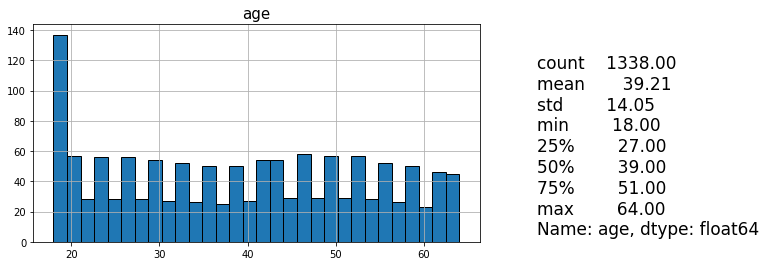

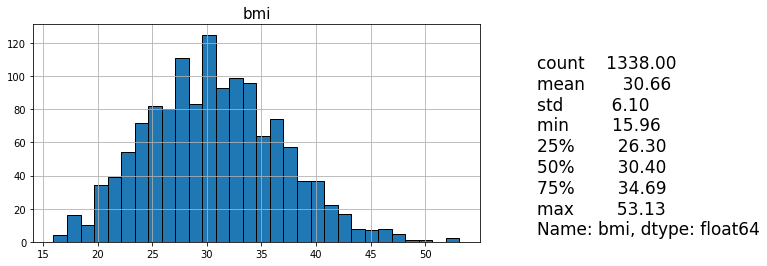

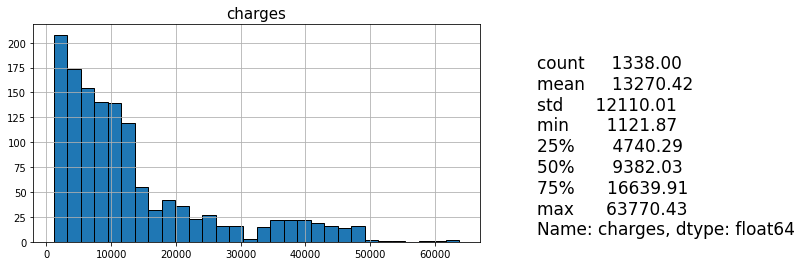

In [17]:
# view histograms for numerical features

for column in num_features:
    desc_num_feature(column)

In [22]:
# categorical feature bar graphs

'''
Hands On Predictive Analytics with Python
Alvaro Fuentes
'''

def cat_feature_bar_chart(feature):
    count= insurance[feature].value_counts()
    percent= 100 * insurance[feature].value_counts(normalize= True)
    df= pd.DataFrame({'count': count, 'percent': percent.round(1)})
    print(df)
    count.plot(kind= 'bar', title= feature)

        count  percent
male      676     50.5
female    662     49.5


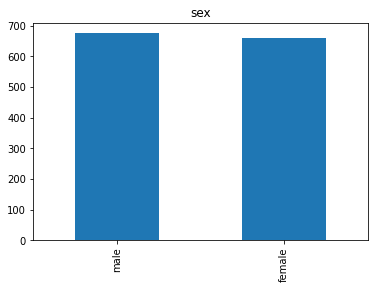

In [25]:
# view categoical bar charts

cat_feature_bar_chart('sex')    

   count  percent
0    574     42.9
1    324     24.2
2    240     17.9
3    157     11.7
4     25      1.9
5     18      1.3


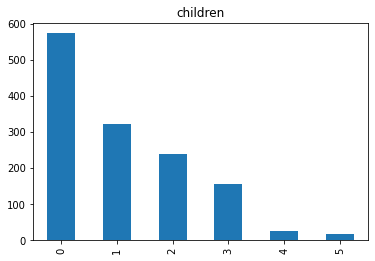

In [26]:
cat_feature_bar_chart('children')   

     count  percent
no    1064     79.5
yes    274     20.5


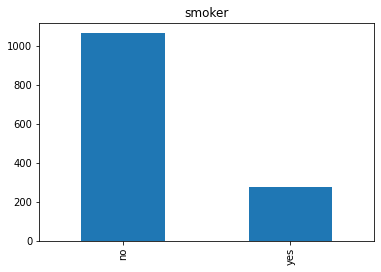

In [27]:
cat_feature_bar_chart('smoker')   

           count  percent
southeast    364     27.2
southwest    325     24.3
northwest    325     24.3
northeast    324     24.2


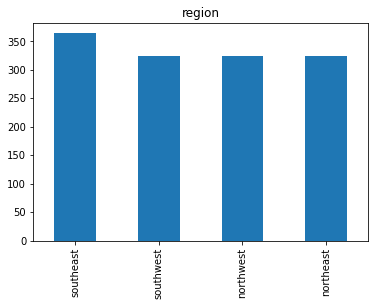

In [28]:
cat_feature_bar_chart('region')   

In [29]:
# Profiling report

pandas_profiling.ProfileReport(insurance)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]